In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_select
ion import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
file=pd.read_csv('iris1.csv')

In [3]:
df=pd.DataFrame(file)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.head(6)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

sepal length    AxesSubplot(0.125,0.749828;0.775x0.130172)
sepal width     AxesSubplot(0.125,0.593621;0.775x0.130172)
petal length    AxesSubplot(0.125,0.437414;0.775x0.130172)
petal width     AxesSubplot(0.125,0.281207;0.775x0.130172)
dtype: object

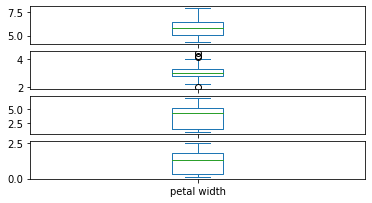

In [8]:
df.plot(kind='box', subplots=True, layout=(5,1))

In [9]:
z1=df.iloc[:,0:-1]

In [10]:
z2=df.iloc[:,-1]

In [11]:
z2

0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
5          Iris-setosa
6          Iris-setosa
7          Iris-setosa
8          Iris-setosa
9          Iris-setosa
10         Iris-setosa
11         Iris-setosa
12         Iris-setosa
13         Iris-setosa
14         Iris-setosa
15         Iris-setosa
16         Iris-setosa
17         Iris-setosa
18         Iris-setosa
19         Iris-setosa
20         Iris-setosa
21         Iris-setosa
22         Iris-setosa
23         Iris-setosa
24         Iris-setosa
25         Iris-setosa
26         Iris-setosa
27         Iris-setosa
28         Iris-setosa
29         Iris-setosa
30         Iris-setosa
31         Iris-setosa
32         Iris-setosa
33         Iris-setosa
34         Iris-setosa
35         Iris-setosa
36         Iris-setosa
37         Iris-setosa
38         Iris-setosa
39         Iris-setosa
40         Iris-setosa
41         Iris-setosa
42         Iris-setosa
43         

In [12]:
from scipy.stats import zscore

In [13]:
z=np.abs(zscore(z1))

In [14]:
z3=pd.concat([z,z2])

In [15]:
z3

,sepal length,sepal width,petal length,petal width,0
0,0.900681,1.032057,1.341272,1.312977,NaN
1,1.143017,0.124958,1.341272,1.312977,NaN
2,1.385353,0.337848,1.398138,1.312977,NaN
3,1.506521,0.106445,1.284407,1.312977,NaN
4,1.021849,1.263460,1.341272,1.312977,NaN
5,0.537178,1.957669,1.170675,1.050031,NaN
6,1.506521,0.800654,1.341272,1.181504,NaN
7,1.021849,0.800654,1.284407,1.312977,NaN
8,1.748856,0.356361,1.341272,1.312977,NaN
9,1.143017,0.106445,1.284407,1.444450,NaN


In [16]:
df.head(6)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [17]:
x=df.iloc[:,0:-1]

In [18]:
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [19]:
y=df.iloc[:,-1]

In [20]:
y

0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
5          Iris-setosa
6          Iris-setosa
7          Iris-setosa
8          Iris-setosa
9          Iris-setosa
10         Iris-setosa
11         Iris-setosa
12         Iris-setosa
13         Iris-setosa
14         Iris-setosa
15         Iris-setosa
16         Iris-setosa
17         Iris-setosa
18         Iris-setosa
19         Iris-setosa
20         Iris-setosa
21         Iris-setosa
22         Iris-setosa
23         Iris-setosa
24         Iris-setosa
25         Iris-setosa
26         Iris-setosa
27         Iris-setosa
28         Iris-setosa
29         Iris-setosa
30         Iris-setosa
31         Iris-setosa
32         Iris-setosa
33         Iris-setosa
34         Iris-setosa
35         Iris-setosa
36         Iris-setosa
37         Iris-setosa
38         Iris-setosa
39         Iris-setosa
40         Iris-setosa
41         Iris-setosa
42         Iris-setosa
43         

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=30)

In [22]:
x_test.shape

(45, 4)

In [23]:
nb=MultinomialNB()

In [24]:
nb

MultinomialNB()

In [25]:
nb.fit(x_train, y_train)

MultinomialNB()

In [26]:
pred=nb.predict(x_test)

In [27]:
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype='<U15')

In [28]:
accuracy_score(y_test, pred)

0.6222222222222222

In [29]:
confusion_matrix(y_test, pred)

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0, 17,  2]], dtype=int64)

In [30]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.43      1.00      0.60        13
 Iris-virginica       1.00      0.11      0.19        19

       accuracy                           0.62        45
      macro avg       0.81      0.70      0.60        45
   weighted avg       0.84      0.62      0.54        45



In [31]:
m=np.array([5.1,3.5,1.4,0.2])

In [32]:
m=m.reshape(1,-1)

In [33]:
nb.predict(m)

array(['Iris-setosa'], dtype='<U15')

In [34]:
dtc=DecisionTreeClassifier()

In [35]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
preaddt=dtc.predict(x_test)

In [37]:
accuracy_score(y_test,preaddt)

0.9777777777777777

In [38]:
confusion_matrix(y_test,preaddt)

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 19]], dtype=int64)

In [39]:
print(classification_report(y_test,preaddt))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [40]:
def dtcpredictor(a):
    a=a.reshape(1,-1)
    preaddtc=dtc.predict(a)
    print(preaddtc)

In [41]:
a=np.array([5.1,3.5,1.4,0.2])

In [42]:
dtcpredictor(a)

['Iris-setosa']


In [43]:
knn=KNeighborsClassifier(n_neighbors=9)

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [45]:
predknn=knn.predict(x_test)

In [46]:
accuracy_score(y_test, predknn)

0.9555555555555556

In [47]:
confusion_matrix(y_test, predknn)

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 17]], dtype=int64)

In [48]:
print(classification_report(y_test, predknn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [49]:
sv=SVC(kernel='linear')

In [50]:
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [51]:
predsv=sv.predict(x_test)

In [56]:
accuracy_score(y_test, predsv)

1.0

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cvs = cross_val_score(sv,x,y,cv=5)

In [71]:
cvs

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [72]:
cvs.mean()

0.9800000000000001

In [74]:
cvs = cross_val_score(dtc,x,y,cv=5)

In [75]:
cvs

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [76]:
cvs.mean()

0.9600000000000002

In [77]:
cvs = cross_val_score(knn,x,y,cv=5)

In [78]:
cvs

array([0.96666667, 1.        , 0.96666667, 0.93333333, 1.        ])

In [79]:
cvs.mean()

0.9733333333333334

In [80]:
import joblib

In [81]:
joblib.dump(sv,'supportvector.obj')

['supportvector.obj']

In [88]:
sv_loaded = joblib.load('supportvector.obj')

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le = LabelEncoder()

In [87]:
df['class']=le.fit_transform(df['class'])

In [90]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
